# F.2
### (a)

In [1]:
import numpy as np

n = 8
A = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        A[i,j] = 1.0 / (1 + 2 * abs(i - j))
        
A_k = A.copy()
Q = np.eye(n)

for k in range(n-2):
    x = A_k[k+1:, k]
    
    x_norm = np.linalg.norm(x)
    if x_norm == 0:
        continue
    
    e1 = np.zeros_like(x)
    e1[0] = 1.0
    
    v = x + np.sign(x[0]) *x_norm * e1
    v = v / np.linalg.norm(v)
    
    Hk = np.eye(n)
    Hk[k+1:, k+1:] -= 2 * np.outer(v, v)
    
    A_k = Hk @ A_k @ Hk
    Q = Q @ Hk
    
T = A_k
Q = Q.T

print("A:")
print(A)
print()

print("Q:")
print(Q)
print()

print("T:")
print(T)
print()

A:
[[1.         0.33333333 0.2        0.14285714 0.11111111 0.09090909
  0.07692308 0.06666667]
 [0.33333333 1.         0.33333333 0.2        0.14285714 0.11111111
  0.09090909 0.07692308]
 [0.2        0.33333333 1.         0.33333333 0.2        0.14285714
  0.11111111 0.09090909]
 [0.14285714 0.2        0.33333333 1.         0.33333333 0.2
  0.14285714 0.11111111]
 [0.11111111 0.14285714 0.2        0.33333333 1.         0.33333333
  0.2        0.14285714]
 [0.09090909 0.11111111 0.14285714 0.2        0.33333333 1.
  0.33333333 0.2       ]
 [0.07692308 0.09090909 0.11111111 0.14285714 0.2        0.33333333
  1.         0.33333333]
 [0.06666667 0.07692308 0.09090909 0.11111111 0.14285714 0.2
  0.33333333 1.        ]]

Q:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.40757165e-01 -4.44454299e-01 -3.17467356e-01
  -2.46919055e-01 -2.02024681e-01 -1.70943961e-01 -1.48151433e-01]
 [ 0

### (b)

In [2]:
import numpy as np

def f_norm(A):
    n = A.shape[0]
    s = 0.0
    for i in range(n):
        for j in range(n):
            if i != j:
                s += A[i, j] * A[i, j]
    return np.sqrt(s)

def qr(A0, err=1e-4):
    A = A0.copy()
    n = A.shape[0]
    I = np.eye(n)

    it = 0
    while f_norm(A) > err:
        mu = A[n-1, n-1]
        Qk, Rk = np.linalg.qr(A - mu * I)
        A = Rk @ Qk + mu * I
        it += 1

    return A, it, f_norm(A)


new_A, it_A, err_A = qr(A)
new_T, it_T, err_T = qr(T)

print("QR on A:")
print("  iterations =", it_A)
print("  final offdiag Frobenius norm =", err_A)
print()

print("QR on T:")
print("  iterations =", it_T)
print("  final offdiag Frobenius norm =", err_T)
print()


QR on A:
  iterations = 112
  final offdiag Frobenius norm = 9.829094274401353e-05

QR on T:
  iterations = 16
  final offdiag Frobenius norm = 5.9938370672125665e-05



# Problem 4:
### (a)

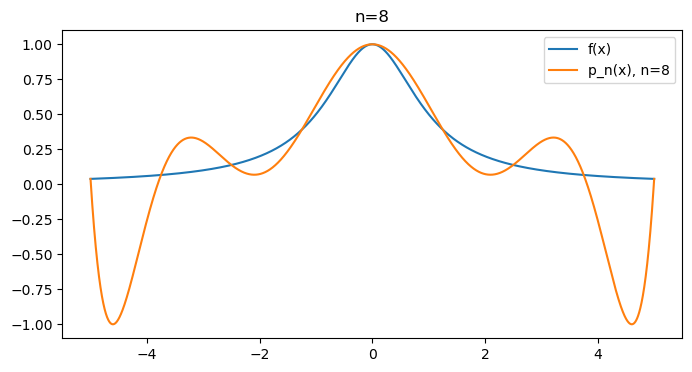

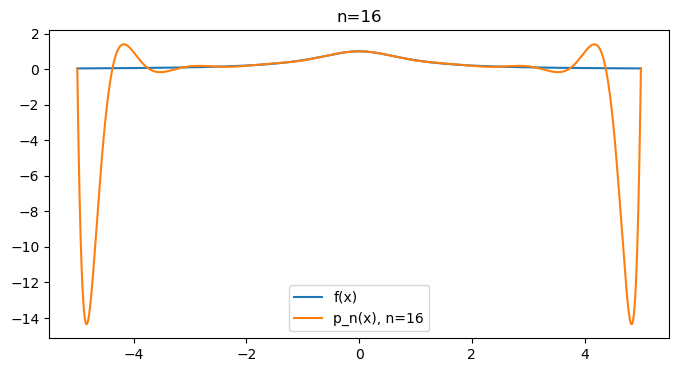

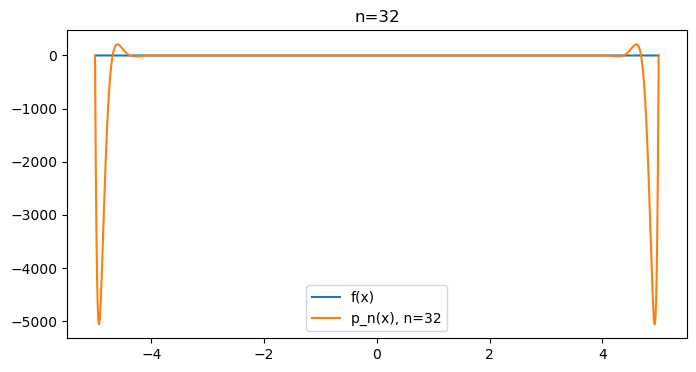

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.0 /(1.0 + x**2)

def lambda_k(x_k):
    n1 = len(x_k)
    lam = np.ones(n1)
    for k in range(n1):
        product = 1.0
        for j in range(n1):
            if j != k:
                product *= (x_k[k] - x_k[j])
        lam[k] = 1.0 / product
    return lam

import numpy as np

def interpolation(x, x_k, f_k, lam):
    p = np.zeros_like(x, dtype=float)

    for i in range(len(x)):
        xi = x[i]

        numerator = 0.0
        denominater =0.0
        exact_node = False

        for k in range(len(x_k)):
            diff = xi - x_k[k]
            if abs(diff) < 1e-14:
                p[i] = f_k[k]
                exact_node = True
                break

            term = lam[k] / diff
            numerator +=term * f_k[k]
            denominater += term

        if not exact_node:
            p[i] = numerator/denominater

    return p


m = 2**13
x = np.linspace(-5.0, 5.0, m +1)
fx = f(x)

for n in [2**3, 2**4, 2**5]:
    x_k = np.linspace(-5.0, 5.0, n + 1)
    f_k = f(x_k)

    lam = lambda_k(x_k)
    p = interpolation(x, x_k, f_k, lam)

    plt.figure(figsize=(8, 4))
    plt.plot(x, fx, label="f(x)")
    plt.plot(x, p, label=f"p_n(x), n={n}")
    plt.title(f"n={n}")
    plt.legend()
    plt.show()


For part a, as n increases, the polynomial converges in the middle interval, but at the two endpoints they diverge and oscillates drastically.

### (b)

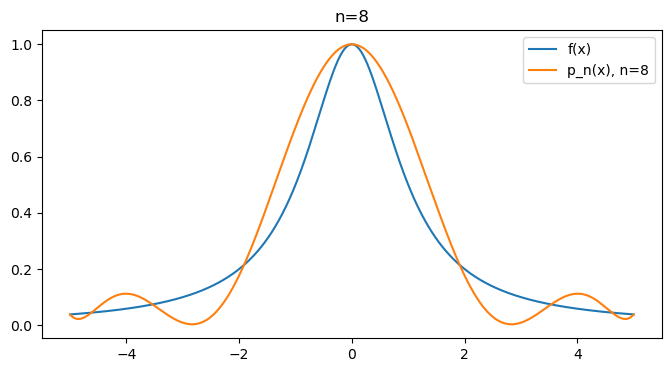

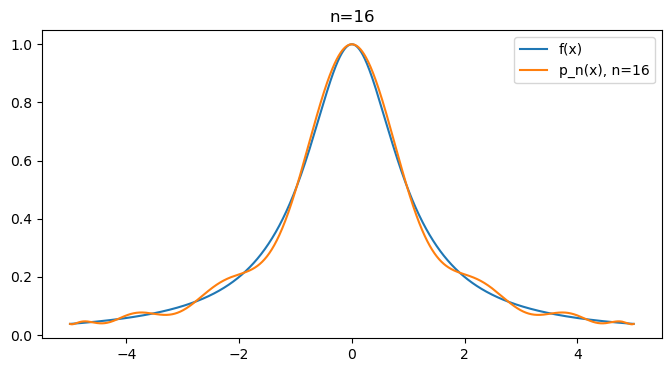

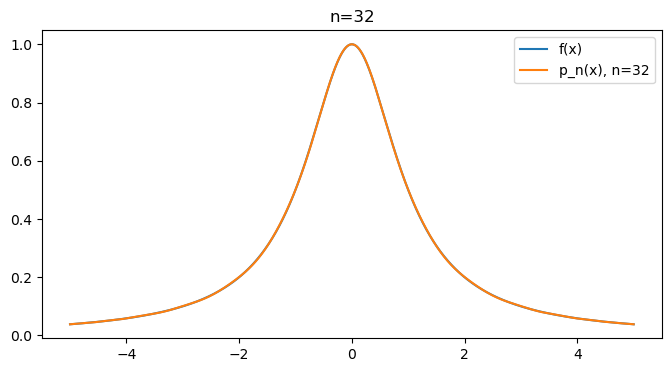

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m = 2**13
k = np.arange(1, m+2)
x = 5* np.cos(( k-0.5 ) *np.pi /(m +1))
fx = f(x)

for n in [2**3, 2**4, 2**5]:
    j = np.arange(0, n+1)
    x_k = 5*np.cos(j* np.pi / n)
    f_k = f(x_k)

    lam = lambda_k(x_k)
    p = interpolation(x, x_k, f_k, lam)

    plt.figure(figsize=(8, 4) )
    plt.plot(x, fx, label="f(x)")
    plt.plot(x, p, label=f"p_n(x), n={n}")
    plt.title(f"n={n}")
    plt.legend()
    plt.show()

For part (b), now the polynomial converges uniformly to f on [-5, 5] as n increases, and the oscillations at two endpoints are greatly reduced.